In [1]:
import numpy as np

import tensorflow as tf
from zipfile import ZipFile 
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD

import wget

In [ ]:
data= "https://github.com/SVizor42/ML_Zoomcamp/releases/download/bee-wasp-data/data.zip"
data= wget.download(data)
!unzip data

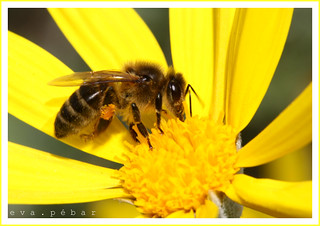

In [3]:
path = './data/train/bee'
name = '5621896609_4a11a34e1a_n.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [4]:
# Create a Sequential model
model = Sequential()

# Add a Convolutional layer with 32 filters, kernel size of (3, 3), and 'relu' activation
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu'))

# Add a MaxPooling layer with pooling size of (2, 2)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the result to feed into a Dense layer
model.add(Flatten())

# Add a Dense layer with 64 neurons and 'relu' activation
model.add(Dense(64, activation='relu'))

# Add the output layer with 1 neuron and appropriate activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Define the SGD optimizer with specified parameters
sgd = SGD(lr=0.002, momentum=0.8)

# Compile the model
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])


2023-11-21 13:08:43.246348: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-21 13:08:43.252812: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-21 13:08:43.253062: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-21 13:08:43.253629: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

### Question 1

Answer: The best function is binary cross entropy


### Question 2

In [5]:
# Print a summary of the model's architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
____________________________________________

Answer: The number of parameters is 896

### Generators and Training

In [6]:
train_gen = ImageDataGenerator(rescale=1./255)

test_gen = ImageDataGenerator(rescale=1./255)

In [7]:
# Training and test data generation

train_ds = train_gen.flow_from_directory(
    './data/train',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    class_mode='binary'
)

test_ds = test_gen.flow_from_directory(
    './data/test',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    class_mode='binary'
)

Found 3677 images belonging to 2 classes.
Found 918 images belonging to 2 classes.


In [8]:
history = model.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10


2023-11-21 13:08:45.662833: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-11-21 13:08:46.302604: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-21 13:08:46.303382: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-21 13:08:46.303413: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-11-21 13:08:46.303997: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-21 13:08:46.304093: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


184/184 [==============================] - 11s 48ms/step - loss: 0.6825 - accuracy: 0.5600 - val_loss: 0.6659 - val_accuracy: 0.5425
Epoch 2/10
184/184 [==============================] - 9s 47ms/step - loss: 0.6546 - accuracy: 0.5945 - val_loss: 0.6148 - val_accuracy: 0.6645
Epoch 3/10
184/184 [==============================] - 9s 47ms/step - loss: 0.6182 - accuracy: 0.6562 - val_loss: 0.5980 - val_accuracy: 0.6394
Epoch 4/10
184/184 [==============================] - 8s 46ms/step - loss: 0.5783 - accuracy: 0.6973 - val_loss: 0.5617 - val_accuracy: 0.7298
Epoch 5/10
184/184 [==============================] - 9s 46ms/step - loss: 0.5464 - accuracy: 0.7280 - val_loss: 0.5495 - val_accuracy: 0.7200
Epoch 6/10
184/184 [==============================] - 9s 46ms/step - loss: 0.5222 - accuracy: 0.7520 - val_loss: 0.5318 - val_accuracy: 0.7473
Epoch 7/10
184/184 [==============================] - 9s 46ms/step - loss: 0.5003 - accuracy: 0.7759 - val_loss: 0.5423 - val_accuracy: 0.7505
Epoch 8/1

### Question 3

In [9]:
# Median train accuracy

train_acc = history.history['accuracy']
median_train_acc = np.median(train_acc)
median_train_acc

0.7400054335594177

Answer: The median of train accuracy is aprox 0.8

### Question 4

In [10]:
# Standard deviation training loss

train_loss = history.history['loss']
sd_training_loss= np.std(train_loss)
sd_training_loss

0.08211251673413825

Answer: The standard deviation of training loss is aprox 0.091

### Data Argumentation

In [11]:
# Training augmented model

train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_gen = ImageDataGenerator(rescale=1./255)

In [12]:
# Training and test data generation

train_ds = train_gen.flow_from_directory(
    './data/train',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    class_mode='binary'
)

test_ds = test_gen.flow_from_directory(
    './data/test',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    class_mode='binary'
)

Found 3677 images belonging to 2 classes.
Found 918 images belonging to 2 classes.


In [13]:
history = model.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10
184/184 [==============================] - 23s 127ms/step - loss: 0.5219 - accuracy: 0.7482 - val_loss: 0.5122 - val_accuracy: 0.7440
Epoch 2/10
184/184 [==============================] - 23s 127ms/step - loss: 0.5069 - accuracy: 0.7642 - val_loss: 0.5124 - val_accuracy: 0.7614
Epoch 3/10
184/184 [==============================] - 23s 126ms/step - loss: 0.4932 - accuracy: 0.7669 - val_loss: 0.4803 - val_accuracy: 0.7734
Epoch 4/10
184/184 [==============================] - 23s 127ms/step - loss: 0.4949 - accuracy: 0.7737 - val_loss: 0.4921 - val_accuracy: 0.7702
Epoch 5/10
184/184 [==============================] - 23s 127ms/step - loss: 0.4791 - accuracy: 0.7852 - val_loss: 0.4726 - val_accuracy: 0.7908
Epoch 6/10
184/184 [==============================] - 23s 127ms/step - loss: 0.4807 - accuracy: 0.7767 - val_loss: 0.4594 - val_accuracy: 0.7832
Epoch 7/10
184/184 [==============================] - 23s 127ms/step - loss: 0.4749 - accuracy: 0.7778 - val_loss: 0.4620 - val_ac

### Question 5

In [14]:
# Mean of test loss

val_loss = history.history['val_loss']
mean_test_loss = np.mean(val_loss)
mean_test_loss

0.4771393835544586

Answer: The mean test loss is aprox 0.48

### Question 6

In [15]:
# Average of test accuracy for the last 5 epochs (from 6 to 10)

val_acc = history.history['val_accuracy']
last_five_val_acc = val_acc[5:]
mean_test_accuracy_last5 = np.mean(last_five_val_acc)
mean_test_accuracy_last5

0.786710238456726

Answer: The mean test accuracy for last 5 epochs is aprox 0.78